<a href="https://colab.research.google.com/github/balavishwatharan/CNN/blob/main/Garbage_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CNN

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!kaggle datasets download -d asdasdasasdas/garbage-classification

100% 82.0M/82.0M [00:03<00:00, 30.3MB/s]
100% 82.0M/82.0M [00:03<00:00, 26.4MB/s]


In [ ]:
!unzip /content/garbage-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: Garbage classification/Garbage classification/cardboard/cardboard152.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard153.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard154.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard155.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard156.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard157.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard158.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard159.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard16.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard160.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/c

#Step 2. Exploratory Data Analysis (EDA)

In [ ]:
import os
import random
from shutil import copyfile

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# Get all the paths
data_dir_list = os.listdir('/content/Garbage classification/Garbage classification')
print(data_dir_list)
path, dirs, files = next(os.walk("/content/Garbage classification/Garbage classification"))
file_count = len(files)
# print(file_count)

['trash', 'cardboard', 'glass', 'paper', 'plastic', 'metal']


In [ ]:
# Make new base directory
original_dataset_dir = '/content/Garbage classification/Garbage classification'
base_dir = '/content/GARBAGE-DATASET/'
os.mkdir(base_dir)

In [ ]:
#create two folders (train and validation)
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

#Under train folder create five folders
# (cloud, folly, rainy, shine, sunrise)

train_trash_dir = os.path.join(train_dir, 'trash')
os.mkdir(train_trash_dir)

train_plastic_dir = os.path.join(train_dir, 'plastic')
os.mkdir(train_plastic_dir)

train_paper_dir = os.path.join(train_dir, 'paper')
os.mkdir(train_paper_dir)

train_cardboard_dir = os.path.join(train_dir, 'cardboard')
os.mkdir(train_cardboard_dir)

train_glass_dir = os.path.join(train_dir, 'glass')
os.mkdir(train_glass_dir)

train_metal_dir = os.path.join(train_dir, 'metal')
os.mkdir(train_metal_dir)
#Under validation folder create five folders
# (cloud, folly, rainy, shine, sunrise)

validation_trash_dir = os.path.join(validation_dir, 'trash')
os.mkdir(validation_trash_dir)

validation_plastic_dir = os.path.join(validation_dir, 'plastic')
os.mkdir(validation_plastic_dir)

validation_paper_dir = os.path.join(validation_dir, 'paper')
os.mkdir(validation_paper_dir)

validation_cardboard_dir = os.path.join(validation_dir, 'cardboard')
os.mkdir(validation_cardboard_dir)

validation_glass_dir = os.path.join(validation_dir, 'glass')
os.mkdir(validation_glass_dir)

validation_metal_dir = os.path.join(validation_dir, 'metal')
os.mkdir(validation_metal_dir)

In [ ]:
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    valid_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    valid_set = shuffled_set[training_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)

In [ ]:
CARBOARD_SOURCE_DIR = '/content/Garbage classification/Garbage classification/cardboard/'
TRAINING_CARBOARD_DIR = '/content/GARBAGE-DATASET/train/cardboard/'
VALID_CARBOARD_DIR = '/content/GARBAGE-DATASET/validation/cardboard/'

GLASS_SOURCE_DIR = '/content/Garbage classification/Garbage classification/glass/'
TRAINING_GLASS_DIR = '/content/GARBAGE-DATASET/train/glass/'
VALID_GLASS_DIR = '/content/GARBAGE-DATASET/validation/glass/'

METAL_SOURCE_DIR = '/content/Garbage classification/Garbage classification/metal/'
TRAINING_METAL_DIR = '/content/GARBAGE-DATASET/train/metal/'
VALID_METAL_DIR = '/content/GARBAGE-DATASET/validation/metal/'

PAPER_SOURCE_DIR = '/content/Garbage classification/Garbage classification/paper/'
TRAINING_PAPER_DIR = '/content/GARBAGE-DATASET/train/paper/'
VALID_PAPER_DIR = '/content/GARBAGE-DATASET/validation/paper/'

PLASTIC_SOURCE_DIR = '/content/Garbage classification/Garbage classification/plastic/'
TRAINING_PLASTIC_DIR = '/content/GARBAGE-DATASET/train/plastic/'
VALID_PLASTIC_DIR = '/content/GARBAGE-DATASET/validation/plastic/'

TRASH_SOURCE_DIR = '/content/Garbage classification/Garbage classification/trash/'
TRAINING_TRASH_DIR = '/content/GARBAGE-DATASET/train/trash/'
VALID_TRASH_DIR = '/content/GARBAGE-DATASET/validation/trash/'

In [ ]:
import os
import random
from shutil import copyfile

split_size = .85

split_data(CARBOARD_SOURCE_DIR, TRAINING_CARBOARD_DIR, VALID_CARBOARD_DIR, split_size)
split_data(GLASS_SOURCE_DIR, TRAINING_GLASS_DIR, VALID_GLASS_DIR, split_size)
split_data(METAL_SOURCE_DIR, TRAINING_METAL_DIR, VALID_METAL_DIR, split_size)
split_data(PAPER_SOURCE_DIR, TRAINING_PAPER_DIR, VALID_PAPER_DIR, split_size)
split_data(PLASTIC_SOURCE_DIR, TRAINING_PLASTIC_DIR, VALID_PLASTIC_DIR, split_size)
split_data(TRASH_SOURCE_DIR, TRAINING_TRASH_DIR, VALID_TRASH_DIR, split_size)

#Data Augmentation

In [ ]:
#import necessary libraries

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# data augmentation for training variable

train_datagen = ImageDataGenerator(rescale = 1./255,zoom_range = 0.2,horizontal_flip=True)

In [ ]:
# data augmentation for testing variable

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# data augmentation on the training data

train_transform = train_datagen.flow_from_directory('/content/GARBAGE-DATASET/train',
                                           target_size =(128,128),
                                           class_mode = 'categorical',
                                           batch_size = 100)

Found 2144 images belonging to 6 classes.


In [ ]:
# data augmentation on the testing data
test_transform = test_datagen.flow_from_directory('/content/GARBAGE-DATASET/validation',
                                           target_size =(128,128),
                                           class_mode = 'categorical',
                                           batch_size = 100)

Found 383 images belonging to 6 classes.


#CNN Model Building


In [ ]:
#to define linear initializations import Sequential
from tensorflow.keras.models import Sequential
#To add Layers import Dense
from tensorflow.keras.layers import Dense
# to create a convolution kernel import Convolution20
from tensorflow.keras.layers import Convolution2D
# Adding Max pooling Layer
from tensorflow.keras.layers import MaxPooling2D
# Adding Flatten Layer
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 31, 31, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 29, 29, 32)        18464     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 14, 14, 32)      

In [ ]:
#Compiling the CNN Model

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])

In [ ]:
res = model.fit_generator(train_transform,steps_per_epoch=2527//64,validation_steps=782//64,epochs=20,
                          validation_data=test_transform)

Epoch 1/20
22/39 [===============>..............] - ETA: 1:01 - loss: 1.7099 - acc: 0.2341

39/39 [==============================] - 92s 2s/step - loss: 1.7099 - acc: 0.2341 - val_loss: 1.6992 - val_acc: 0.2350


In [ ]:
# Save model

model.save('Garbage2.h5')

#Testing the model


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

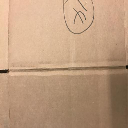

In [ ]:
# Testing 1

img = image.load_img('/content/GARBAGE-DATASET/validation/cardboard/cardboard1.jpg',target_size =(128,128))
img

In [ ]:
x = image.img_to_array(img) # converting the image into array
x = np.expand_dims(x,axis = 0) # expanding dimensions
pred = np.argmax(model.predict(x)) # predicting the higher probability index
op = ['cardboard','glass','metal','paper','plastic','trash']
op[pred]

1/1 [==============================] - 0s 29ms/step


'paper'

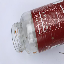

In [ ]:
# Testing 2

img_1 = image.load_img('/content/GARBAGE-DATASET/validation/glass/glass117.jpg',target_size =(64,64))
img_1

In [ ]:
x = image.img_to_array(img_1) # converting the image into array
x = np.expand_dims(x,axis = 0) # expanding dimensions
pred = np.argmax(model.predict(x)) # predicting the higher probability index
op = ['cardboard','glass','metal','paper','plastic','trash']
op[pred]

In [ ]:
# Testing 3

img_2= image.load_img('/content/testing/Garbage classification/metal/metal100.jpg',target_size =(64,64))
img_2

In [ ]:
# Testing 3

x = image.img_to_array(img_2) # converting the image into array
x = np.expand_dims(x,axis = 0) # expanding dimensions
pred = np.argmax(model.predict(x)) # predicting the higher probability index
op = ['cardboard','glass','metal','paper','plastic','trash']
op[pred]

In [ ]:
# Testing 4

img_3= image.load_img('/content/testing/Garbage classification/paper/paper1.jpg',target_size =(64,64))
img_3

In [ ]:
# Testing 4

x = image.img_to_array(img_3) # converting the image into array
x = np.expand_dims(x,axis = 0) # expanding dimensions
pred = np.argmax(model.predict(x)) # predicting the higher probability index
op = ['cardboard','glass','metal','paper','plastic','trash']
op[pred]

In [ ]:
# Testing 5

img_4= image.load_img('/content/testing/Garbage classification/plastic/plastic103.jpg',target_size =(64,64))
img_4

In [ ]:
# Testing 5

x = image.img_to_array(img_4) # converting the image into array
x = np.expand_dims(x,axis = 0) # expanding dimensions
pred = np.argmax(model.predict(x)) # predicting the higher probability index
op = ['cardboard','glass','metal','paper','plastic','trash']
op[pred]

In [ ]:
# Testing 6

img_5= image.load_img('/content/testing/Garbage classification/trash/trash88.jpg',target_size =(64,64))
img_5

In [ ]:
# Testing 6

x = image.img_to_array(img_5) # converting the image into array
x = np.expand_dims(x,axis = 0) # expanding dimensions
pred = np.argmax(model.predict(x)) # predicting the higher probability index
op = ['cardboard','glass','metal','paper','plastic','trash']
op[pred]